# Ultrasonic Basic Tests

## Objective

Evaluate the A02YYUW Ultrasonic Sensor's suitability for the project by testing its ability to measure various distances under different lighting conditions.

## Experiment Details

### Experiment Setup

- **Sensor Positioning**: At regular 0.5m intervals ranging from 0.5m to 5.0m, with the sensor directed at a wall.
- **Test Environments**: Indoors and outdoors.
- **Data Collection**: Each test generated approximately 500 distance measurement points.

### Data Extraction

- **Indoors & Outdoors**: Employed a Raspberry Pi and custom Python code to save the data into a text file. 

## Data Strucutre and Cleanup

- **File Organization**: Each distance interval (e.g., 0.5m, 1.0m, etc.) stores its measurements in a separate file located in their respective folders.
- **Raspberry Pi**: Every measurement from the Raspberry Pi includes time, distance and signal strength:

    ```text
    09:48:30 1030 659
    ```

- I keep the distances and filter out time and signal strength.

## Sensor Specification

- The sensor claims precision up to 450cm.
- It has a frequency of 10Hz.

## Code Setup

### Imports

To maintain a clean and organized notebook, various functionalities have been distributed into separate Python modules:

- [`processing.py`](../src/data/processing.py) includes data processing functions.
- [`loader.py`](../src/data/loader.py) aids in extracting sensor data from text files.
- [`basic_graphs.py`](../src/graphing/basic_graphs.py) provides utilities for data visualization.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

from cycling_safety_analysis.data import cleaner, processing
from cycling_safety_analysis.data.loader import FolderData
from cycling_safety_analysis.graphing import basic_graphs

### Data Preparation and Loading

I define the list of actual distances measured and load the data files.

In [2]:
ACTUAL_DISTANCES = [0.5 * i for i in range(1, 11)]

INDOORS_DATA_PATH = pathlib.Path("../data/processed/ultrasonic_basic_tests/indoors/")
OUTDOORS_DATA_PATH = pathlib.Path("../data/processed/ultrasonic_basic_tests/outdoors/")

indoors_data = FolderData(INDOORS_DATA_PATH)
outdoors_data = FolderData(OUTDOORS_DATA_PATH)

## Data Analysis

### Accuracy Assessment

- **Objective**: The sensor's accuracy is evaluated by comparing the mean measured distance to the actual distance at each interval.
- **Explanation**: Accuracy in our tests refers to how close our measurements are to the true values.
- **Analysis**: From the table below, we can see that the mean distance measured by the sensor at each interval, under both indoor and outdoor conditions, are nearly identical to that of the actual distance.

In [3]:
indoors_mean = processing.get_mean(indoors_data.distances)
outdoors_mean = processing.get_mean(outdoors_data.distances)

data = {
    "Actual Distance": ACTUAL_DISTANCES,
    "Outdoors Mean": outdoors_mean,
    "Indoors Mean": indoors_mean,
}
df = pd.DataFrame(data)
display(df.T)

,0,1,2,3,4,5,6,7,8,9
Actual Distance,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
Outdoors Mean,0.50,1.03,1.50,2.00,2.52,3.04,3.47,3.74,3.90,1.36
Indoors Mean,0.51,1.01,1.51,2.01,2.50,3.00,3.50,4.00,4.52,4.93


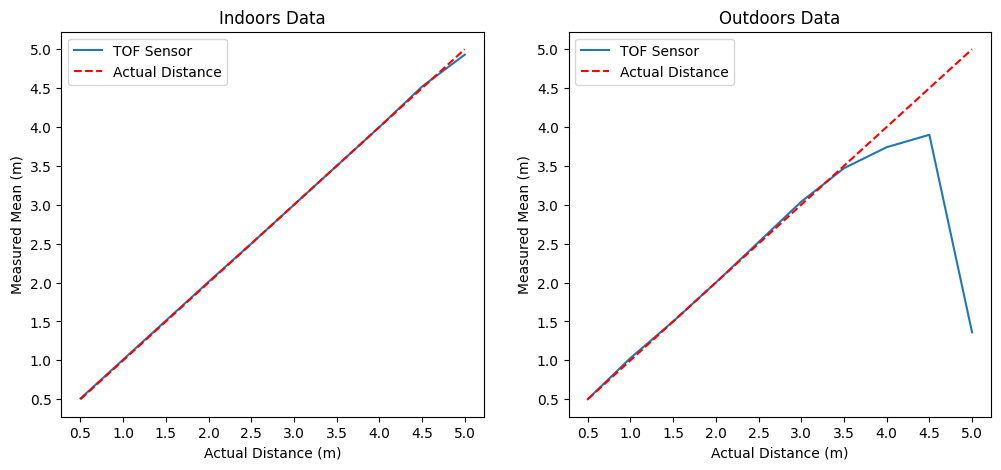

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_mean_vs_actual_distance(axes[0], indoors_mean, "Indoors Data")
basic_graphs.plot_mean_vs_actual_distance(axes[1], outdoors_mean, "Outdoors Data")
plt.show()

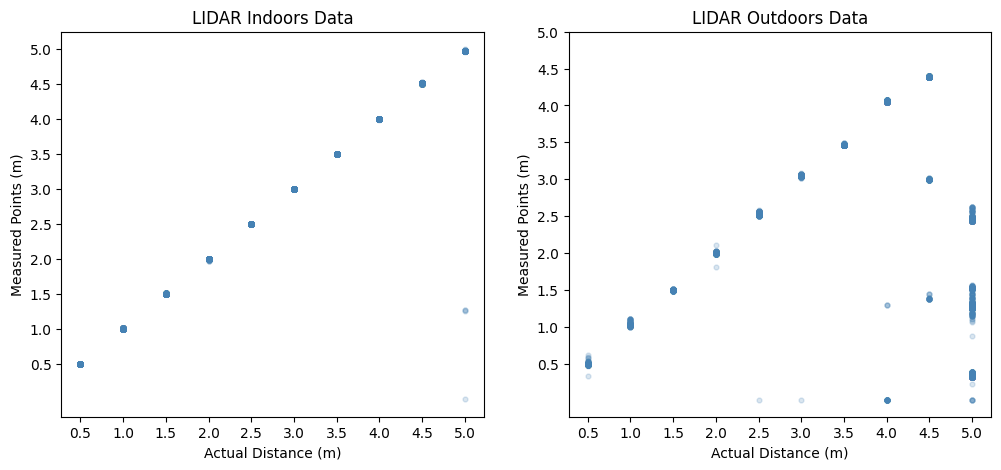

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_scatter(axes[0], indoors_data.distances, "LIDAR Indoors Data")
basic_graphs.plot_scatter(axes[1], outdoors_data.distances, "LIDAR Outdoors Data")
plt.show()

,0,1,2,3,4,5,6,7,8,9
Indoors,0.00,0.00,0.0,0.01,0.00,0.00,0.0,0.00,0.00,0.42
Outdoors,0.02,0.02,0.0,0.02,0.16,0.16,0.0,1.07,0.87,0.86


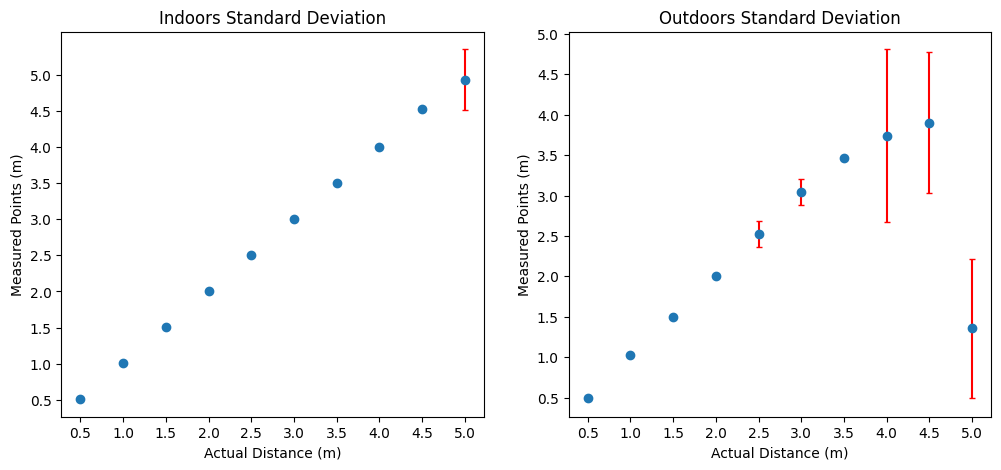

In [6]:
indoors_std = processing.get_std(indoors_data.distances)
outdoors_std = processing.get_std(outdoors_data.distances)

std_data = {
    "Indoors": indoors_std,
    "Outdoors": outdoors_std,
}
df = pd.DataFrame(std_data)
display(df.T)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_std_errorbar(axes[0], indoors_mean, indoors_std, "Indoors Standard Deviation")
basic_graphs.plot_std_errorbar(axes[1], outdoors_mean, outdoors_std, "Outdoors Standard Deviation")
plt.show()

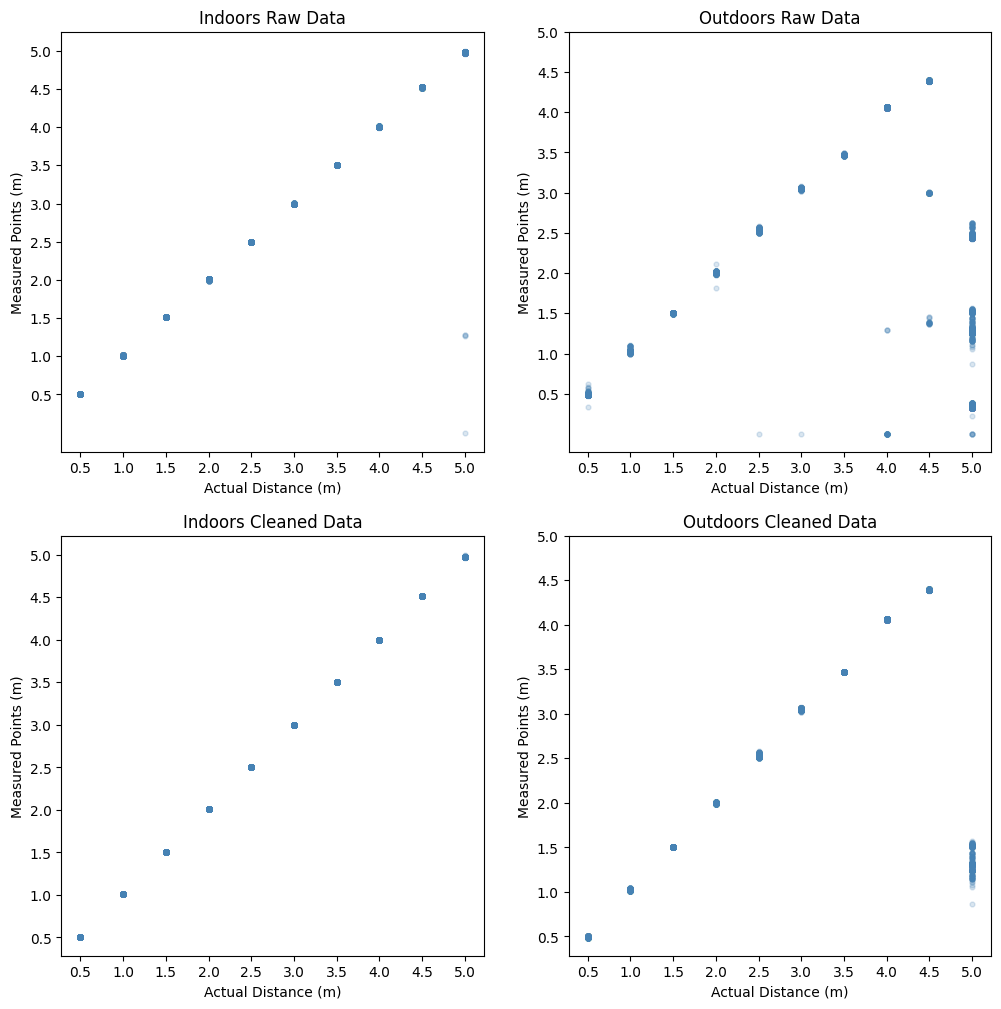

In [7]:
indoors_cleaned = cleaner.clean_basic_test_data(indoors_data.distances)
outdoors_cleaned = cleaner.clean_basic_test_data(outdoors_data.distances)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

basic_graphs.plot_scatter(axes[0][0], indoors_data.distances, "Indoors Raw Data")
basic_graphs.plot_scatter(axes[0][1], outdoors_data.distances, "Outdoors Raw Data")

basic_graphs.plot_scatter(axes[1][0], indoors_cleaned, "Indoors Cleaned Data")
basic_graphs.plot_scatter(axes[1][1], outdoors_cleaned, "Outdoors Cleaned Data")
plt.show()

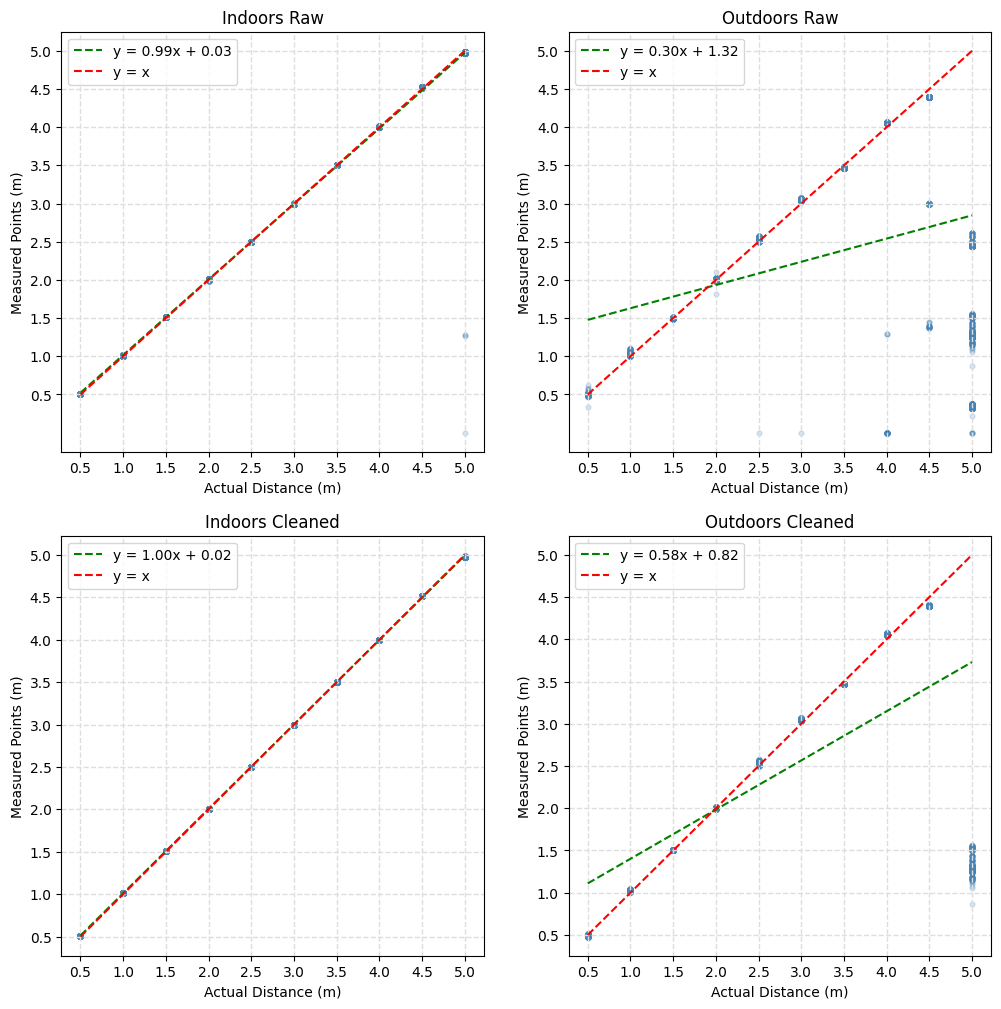

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

basic_graphs.plot_best_fit_scatter(axes[0][0], indoors_data.distances, "Indoors Raw")
basic_graphs.plot_best_fit_scatter(axes[0][1], outdoors_data.distances, "Outdoors Raw")

basic_graphs.plot_best_fit_scatter(axes[1][0], indoors_cleaned, "Indoors Cleaned")
basic_graphs.plot_best_fit_scatter(axes[1][1], outdoors_cleaned, "Outdoors Cleaned")

plt.show()